In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

MAIN_PATH = '/Users/a80099708/Downloads/'
df = pd.read_csv(MAIN_PATH +'uci-bank-full-1.csv')

original_df = df.copy()
term_deposits = df.copy()
# Have a grasp of how our data looks.
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [70]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
deposit      45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


/Users/a80099708/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



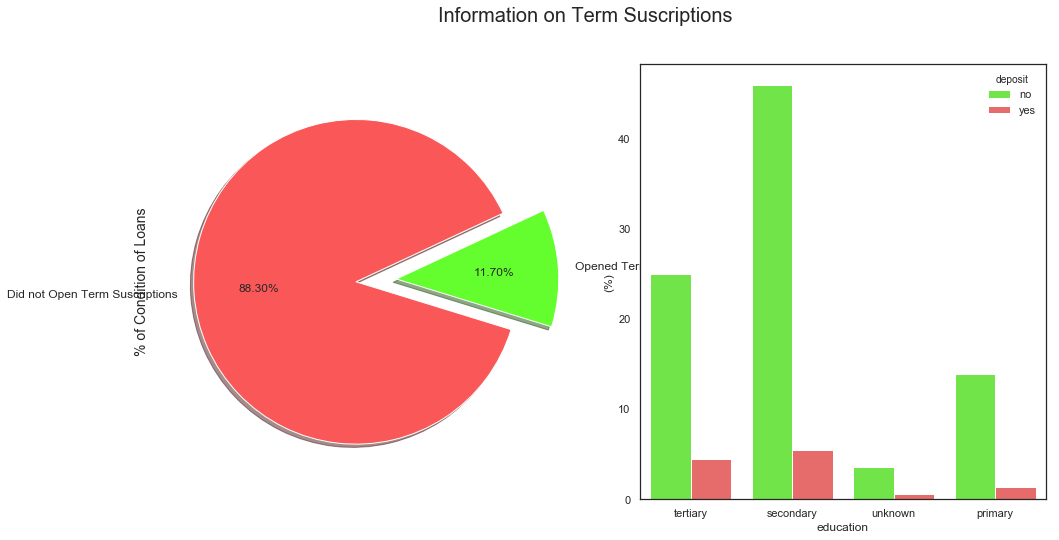

In [72]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="deposit", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

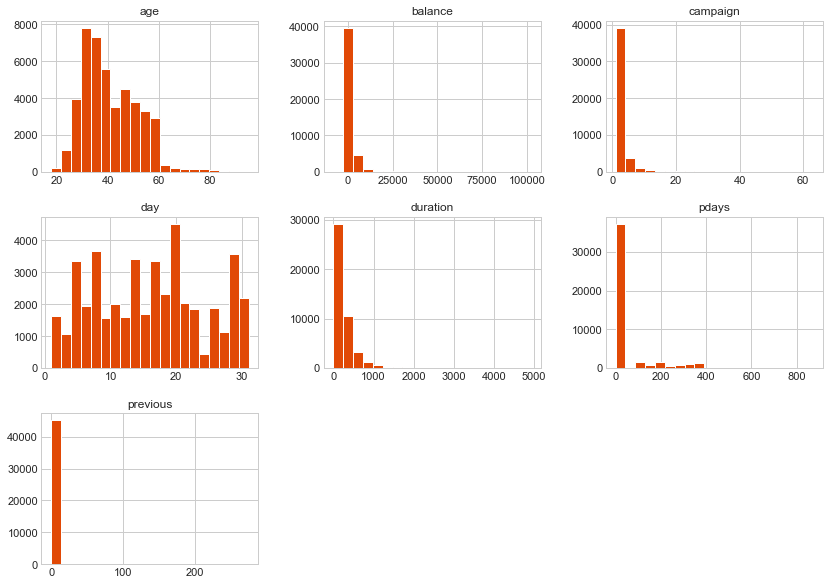

In [73]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [74]:
# Classification 기준값인 deposit을 맨 앞으로 옮긴다.
dep = df['deposit']
#Drop the deposit column
df.drop(labels=['deposit'], axis=1,inplace = True)
df.insert(0, 'deposit', dep)
df.head()


,deposit,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,no,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,no,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,no,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,no,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,no,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [75]:
# deposit, house, loan, default 의 yes, no를 binary 0,1 값으로 변경
def convert_to_int(df, new_column, target_column):
    df[new_column] = df[target_column].apply(lambda x: 0 if x == 'no' else 1)
    return df[new_column].value_counts()


In [76]:
convert_to_int(df, "deposit_int", "deposit") #Create a deposit int
convert_to_int(df, "housing_int", "housing") # Create housingint column
convert_to_int(df, "loan_int", "loan") #Create a loan_int column
convert_to_int(df, "default_int", "default") #Create a default_int column


0    44396
1      815
Name: default_int, dtype: int64

In [77]:
# 변환전 3개 컬럼은 drop 처리한다.
df.drop(['housing', 'loan', 'default'], axis=1, inplace=True)

In [78]:
df.head()

,deposit,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit_int,housing_int,loan_int,default_int
0,no,58,management,married,tertiary,2143,unknown,5,may,261,1,-1,0,unknown,0,1,0,0
1,no,44,technician,single,secondary,29,unknown,5,may,151,1,-1,0,unknown,0,1,0,0
2,no,33,entrepreneur,married,secondary,2,unknown,5,may,76,1,-1,0,unknown,0,1,1,0
3,no,47,blue-collar,married,unknown,1506,unknown,5,may,92,1,-1,0,unknown,0,1,0,0
4,no,33,unknown,single,unknown,1,unknown,5,may,198,1,-1,0,unknown,0,0,0,0


In [79]:
#월별 분포 및, 가입/거절 비율

print(df['month'].value_counts())
cross_month = pd.crosstab(df['month'], df['deposit']).apply(lambda x: x/x.sum() * 100)
cross_month

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


deposit,no,yes
month,,
apr,5.899003,10.909435
aug,13.924653,13.008130
dec,0.285557,1.890717
feb,5.530785,8.338060
jan,3.158659,2.684818
jul,15.700616,11.854793
jun,12.010921,10.323313
mar,0.573619,4.688977
may,32.165222,17.489128


In [80]:
# 기준 년월 값으로 month정보를 변경한다. 

df['year'] = 2018
lst = [df]

# Create a column with the numeric values of the months.
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

# Change datatype from int32 to int64
df["month_int"] = df["month_int"].astype(np.int64)
df.head()


,deposit,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit_int,housing_int,loan_int,default_int,year,month_int
0,no,58,management,married,tertiary,2143,unknown,5,may,261,1,-1,0,unknown,0,1,0,0,2018,5
1,no,44,technician,single,secondary,29,unknown,5,may,151,1,-1,0,unknown,0,1,0,0,2018,5
2,no,33,entrepreneur,married,secondary,2,unknown,5,may,76,1,-1,0,unknown,0,1,1,0,2018,5
3,no,47,blue-collar,married,unknown,1506,unknown,5,may,92,1,-1,0,unknown,0,1,0,0,2018,5
4,no,33,unknown,single,unknown,1,unknown,5,may,198,1,-1,0,unknown,0,0,0,0,2018,5


In [81]:
df.drop(['day','year', 'deposit'], axis=1, inplace=True)

In [82]:
# 불필요 컬럼 삭제 및 deposit binary 변환 컬럼을 맨 앞으로
df = df.rename(columns={"deposit_int": "deposit"})

In [83]:
df.head()

,age,job,marital,education,balance,contact,month,duration,campaign,pdays,previous,poutcome,deposit,housing_int,loan_int,default_int,month_int
0,58,management,married,tertiary,2143,unknown,may,261,1,-1,0,unknown,0,1,0,0,5
1,44,technician,single,secondary,29,unknown,may,151,1,-1,0,unknown,0,1,0,0,5
2,33,entrepreneur,married,secondary,2,unknown,may,76,1,-1,0,unknown,0,1,1,0,5
3,47,blue-collar,married,unknown,1506,unknown,may,92,1,-1,0,unknown,0,1,0,0,5
4,33,unknown,single,unknown,1,unknown,may,198,1,-1,0,unknown,0,0,0,0,5


In [84]:
first = df['deposit']
df.drop(labels=['deposit'], axis=1,inplace = True)
df.insert(0, 'deposit', first)
df.head()

,deposit,age,job,marital,education,balance,contact,month,duration,campaign,pdays,previous,poutcome,housing_int,loan_int,default_int,month_int
0,0,58,management,married,tertiary,2143,unknown,may,261,1,-1,0,unknown,1,0,0,5
1,0,44,technician,single,secondary,29,unknown,may,151,1,-1,0,unknown,1,0,0,5
2,0,33,entrepreneur,married,secondary,2,unknown,may,76,1,-1,0,unknown,1,1,0,5
3,0,47,blue-collar,married,unknown,1506,unknown,may,92,1,-1,0,unknown,1,0,0,5
4,0,33,unknown,single,unknown,1,unknown,may,198,1,-1,0,unknown,0,0,0,5


In [85]:
# 초 단위 상담시간을 분단위로 변경 (자료값의 범위가 너무 커서 조정이 필요함)
decimal_points = 2
df['duration'] = df['duration'] / 60
df['duration'] = df['duration'].apply(lambda x: round(x, decimal_points))
df.head()

,deposit,age,job,marital,education,balance,contact,month,duration,campaign,pdays,previous,poutcome,housing_int,loan_int,default_int,month_int
0,0,58,management,married,tertiary,2143,unknown,may,4.35,1,-1,0,unknown,1,0,0,5
1,0,44,technician,single,secondary,29,unknown,may,2.52,1,-1,0,unknown,1,0,0,5
2,0,33,entrepreneur,married,secondary,2,unknown,may,1.27,1,-1,0,unknown,1,1,0,5
3,0,47,blue-collar,married,unknown,1506,unknown,may,1.53,1,-1,0,unknown,1,0,0,5
4,0,33,unknown,single,unknown,1,unknown,may,3.30,1,-1,0,unknown,0,0,0,5


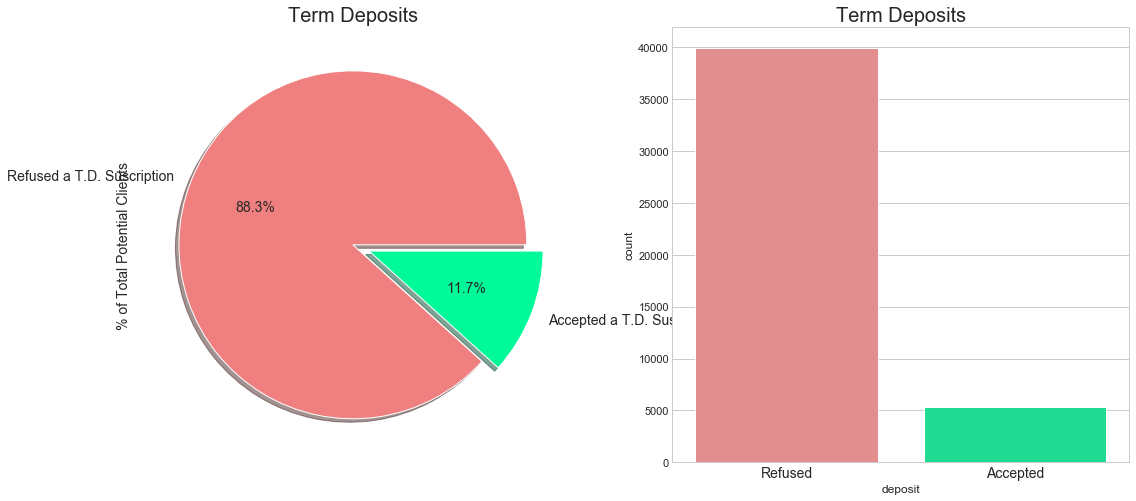

In [86]:
# 정기예금 가입자 수락 비율 분석
f,ax=plt.subplots(1,2,figsize=(18,8))
colors=["#F08080", "#00FA9A"]
labels = 'Refused a T.D. Suscription', 'Accepted a T.D. Suscription'
df['deposit'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=colors, labels=labels,fontsize=14)
ax[0].set_title('Term Deposits', fontsize=20)
ax[0].set_ylabel('% of Total Potential Clients', fontsize=14)
sns.countplot('deposit',data=df,ax=ax[1], palette=colors)
ax[1].set_title('Term Deposits', fontsize=20)
ax[1].set_xticklabels(['Refused', 'Accepted'], fontsize=14)
plt.show()

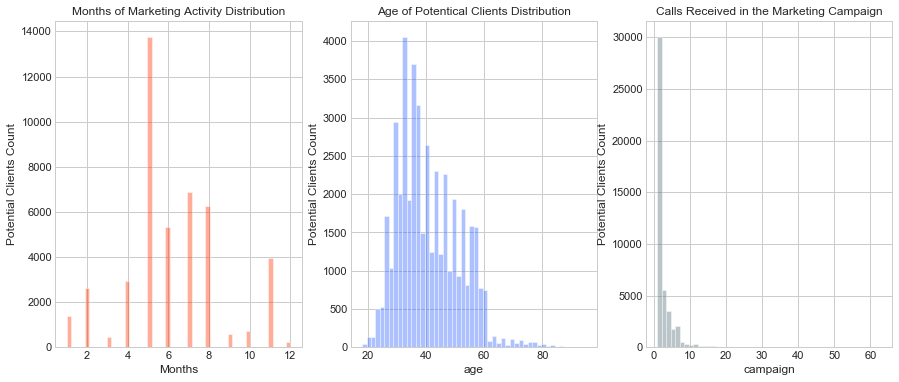

In [87]:
# 정기예금 가입에 영향도가 높을 것으로 예상되는 피쳐값에 대한 분포 확인
# 월별, 연령별, 마케팅 콜 횟수
import seaborn as sns

f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# 월별
sns.distplot(df['month_int'], kde=False, color="#ff3300", ax=axes[0]).set_title('Months of Marketing Activity Distribution')
axes[0].set_ylabel('Potential Clients Count')
axes[0].set_xlabel('Months')

# 연령별
sns.distplot(df['age'], kde=False, color="#3366ff", ax=axes[1]).set_title('Age of Potentical Clients Distribution')
axes[1].set_ylabel('Potential Clients Count')

# 마케팅 콜 횟수
sns.distplot(df['campaign'], kde=False, color="#546E7A", ax=axes[2]).set_title('Calls Received in the Marketing Campaign')
axes[2].set_ylabel('Potential Clients Count')

plt.show()


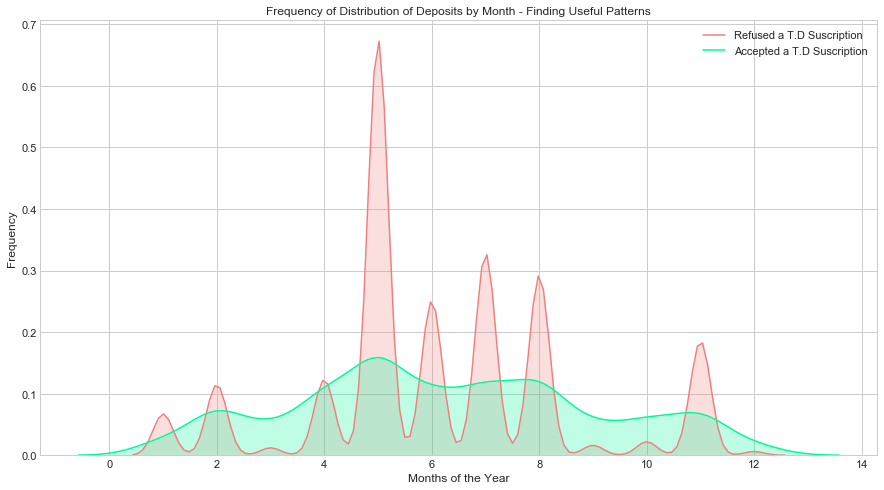

In [88]:
# 분석 1 : 월별 가입 수락률 분석
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['deposit'] == 0),'month_int'] , color='#F08080',shade=True,label='Refused a T.D Suscription')
ax=sns.kdeplot(df.loc[(df['deposit'] == 1),'month_int'] , color='#00FA9A',shade=True, label='Accepted a T.D Suscription')
ax.set(xlabel='Months of the Year', ylabel='Frequency')
plt.title('Frequency of Distribution of Deposits by Month - Finding Useful Patterns')
plt.show()


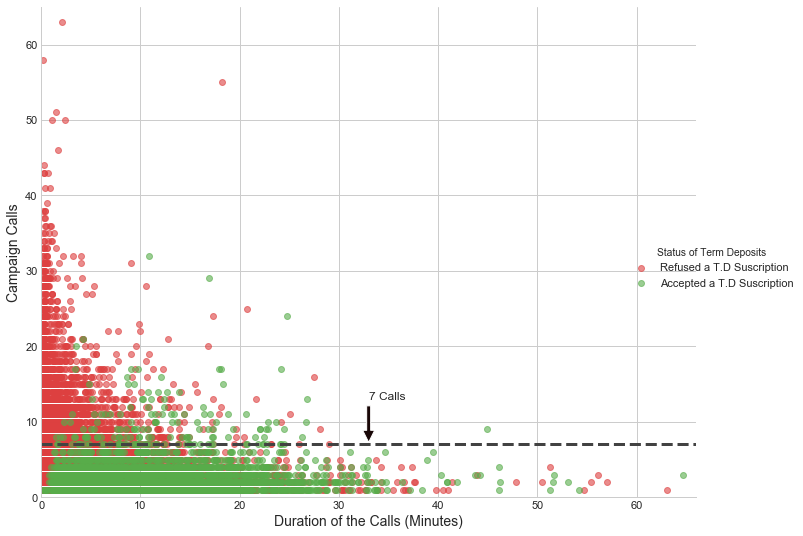

In [89]:
# 분석 2 : 마케팅 콜 횟수 및 연결 시간 대비 수락률 분석
colors = ['#DD4040', '#58AD4B', '#0096AA', '#9B00AA']


g = sns.lmplot(x='duration', y='campaign', data=df,
           fit_reg=False, # No regression line
           hue='deposit',
        palette = colors,
        scatter_kws={'alpha':0.6}
          ) 

g.fig.set_size_inches(12,8)
# title
new_title = 'Status of Term Deposits'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Refused a T.D Suscription', 'Accepted a T.D Suscription']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.axis([0,66,0,65])

# 가이드라인 위치 : 7번 마케팅 콜 이후로 거절비율이 급격히 증가한다.
plt.axhline(y=7, linewidth=3, color="#424242", linestyle='--')

# 화살표 설명
plt.annotate('7 Calls', xy=(33, 7), xytext=(33,13),
            arrowprops=dict(facecolor='#190707', shrink=0.05))
plt.xlabel('Duration of the Calls (Minutes)', fontsize=14)
plt.ylabel('Campaign Calls', fontsize=14)

plt.show()


In [90]:
total_deposit = df['deposit'].count()
per_deposit = df['deposit'].value_counts()/total_deposit * 100

accepted = per_deposit[0]
refused = per_deposit[1]


In [91]:
print(accepted, refused)

88.30151954170445 11.698480458295547


In [92]:
success_rate = pd.crosstab(df['deposit'], df['campaign']).apply(lambda x: x/x.sum() * 100)
print(success_rate) #Notice rejection for offers increases after three calls that should be the threshold for the marketing team
#Nevetheless, this makes 90% of our potential clients so only 10% is likely to reject, we still save time and effort.
onecall_nod = success_rate.at[0,1]
onecall_d = success_rate.at[1,1]
twocalls_nod = success_rate.at[0,2]
twocalls_d = success_rate.at[1,2]
threecalls_nod = success_rate.at[0,3]
threecalls_d = success_rate.at[1,3]
fourcalls_nod = success_rate.at[0,4]
fourcalls_d = success_rate.at[1,4]
fivecalls_nod = success_rate.at[0,5]
fivecalls_d = success_rate.at[1,5]
sixcalls_nod = success_rate.at[0,6]
sixcalls_d = success_rate.at[1,6]
sevencalls_nod = success_rate.at[0,7]
sevencalls_d = success_rate.at[1,7]

campaign         1          2          3          4          5          6   \
deposit                                                                      
0         85.402417  88.796481  88.806376  90.999432  92.120181  92.873741   
1         14.597583  11.203519  11.193624   9.000568   7.879819   7.126259   

campaign         7          8          9          10  ...       39     41  \
deposit                                               ...                   
0         93.605442  94.074074  93.577982  94.736842  ...    100.0  100.0   
1          6.394558   5.925926   6.422018   5.263158  ...      0.0    0.0   

campaign     43     44     46     50     51     55     58     63  
deposit                                                           
0         100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  
1           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[2 rows x 48 columns]


In [93]:
onecall_nod =  round(onecall_nod, 2)
onecall_d = round(onecall_d, 2)
twocalls_nod = round(twocalls_nod,2)
twocalls_d = round(twocalls_d, 2)
threecalls_nod = round(threecalls_nod, 2)
threecalls_d = round(threecalls_d, 2)
fourcalls_nod = round(fourcalls_nod, 2)
fourcalls_d = round(fourcalls_d, 2)
fivecalls_nod = round(fivecalls_nod, 2)
fivecalls_d = round(fivecalls_d, 2)
sixcalls_nod = round(sixcalls_nod, 2)
sixcalls_d = round(sixcalls_d, 2)
sevencalls_nod = round(sevencalls_nod, 2)
sevencalls_d = round(sevencalls_d, 2)


accepted = round(accepted, 2)
refused = round(refused, 2)


In [94]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as FF

# Add table data
table_data = [['Number of <br> Calls', 'Refused T.D', 'Accepted T.D'],
              ['One Call', onecall_nod , onecall_d],
              ['Two Calls', twocalls_nod , twocalls_d],
              ['Three Calls', threecalls_nod, threecalls_d],
              ['Four Calls', fourcalls_nod, fourcalls_d],
              ['Five Calls', fivecalls_nod, fivecalls_d],
              ['Six Calls', sixcalls_nod, sixcalls_d],
              ['Seven Calls', sevencalls_nod, sevencalls_d],
              ['Overall Performance', refused, accepted]]
# Initialize a figure with FF.create_table(table_data)
figure = FF.create_table(table_data, height_constant=60)

# Add graph data
calls = ['One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Overall Performance']
Ref = [onecall_nod, twocalls_nod, threecalls_nod, fourcalls_nod, fivecalls_nod, sixcalls_nod, sevencalls_nod, refused]
Acc = [onecall_d, twocalls_d, threecalls_d, fourcalls_d, fivecalls_d, sixcalls_d, sevencalls_d, accepted]


In [95]:
print(figure)

Figure({
    'data': [{'colorscale': [[0, '#00083e'], [0.5, '#ededee'], [1, '#ffffff']],
              'hoverinfo': 'none',
              'opacity': 0.75,
              'showscale': False,
              'type': 'heatmap',
              'uid': '7feeb471-98a5-402b-96e1-a7c6df0e9609',
              'z': [[0, 0, 0], [0.5, 0.5, 0.5], [1, 1, 1], [0.5, 0.5, 0.5], [1, 1,
                    1], [0.5, 0.5, 0.5], [1, 1, 1], [0.5, 0.5, 0.5], [1, 1, 1]]}],
    'layout': {'annotations': [{'align': 'left',
                                'font': {'color': '#ffffff'},
                                'showarrow': False,
                                'text': '<b>Number of <br> Calls</b>',
                                'x': -0.45,
                                'xanchor': 'left',
                                'xref': 'x',
                                'y': 0,
                                'yref': 'y'},
                               {'align': 'left',
                                'font': {'

In [96]:
lst = [df]
for column in lst:
    column.loc[column["age"] < 30,  "age_category"] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), "age_category"] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), "age_category"] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), "age_category"] = 50
    column.loc[column["age"] >= 60, "age_category"] = 60
 
df['age_category'] = df['age_category'].astype(np.int64)
df.dtypes


deposit           int64
age               int64
job              object
marital          object
education        object
balance           int64
contact          object
month            object
duration        float64
campaign          int64
pdays             int64
previous          int64
poutcome         object
housing_int       int64
loan_int          int64
default_int       int64
month_int         int64
age_category      int64
dtype: object

In [97]:
cross_age_category = pd.crosstab(df['deposit'], df['age_category']).apply(lambda x: x/x.sum() * 100)
cross_age_category


age_category,20,30,40,50,60
deposit,,,,,
0,82.40091,89.424512,90.879451,90.665874,66.367713
1,17.59909,10.575488,9.120549,9.334126,33.632287


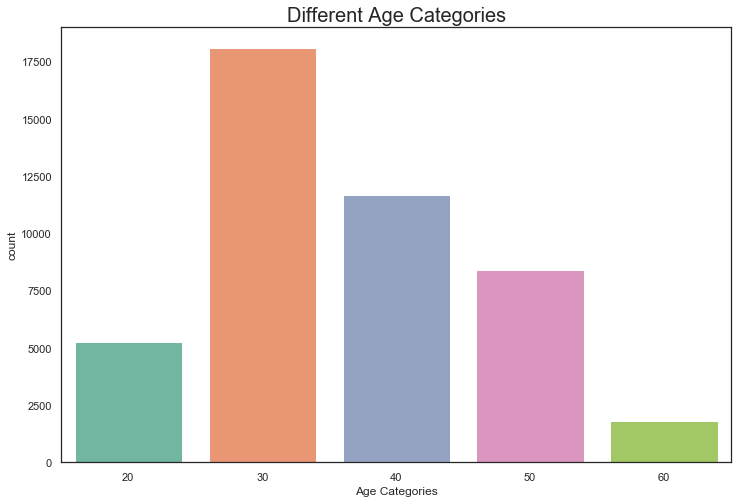

In [98]:
import seaborn as sns
sns.set(style="white")
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x="age_category", data=df, palette="Set2")
ax.set_title("Different Age Categories", fontsize=20)
ax.set_xlabel("Age Categories")
plt.show()


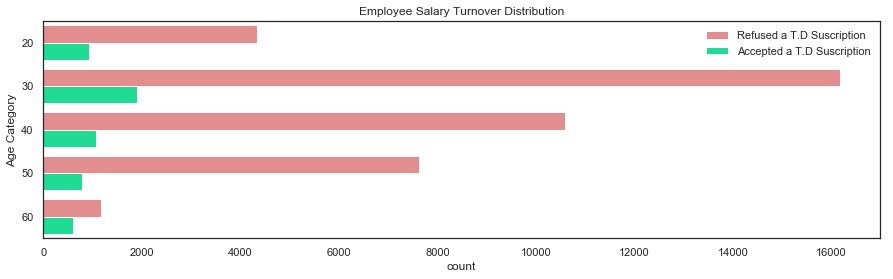

In [99]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(15, 4))
colors = ["#F08080", "#00FA9A"]
labels = ['No Deposit', 'Deposit']
sns.countplot(y="age_category", hue='deposit', data=df, palette=colors).set_title('Employee Salary Turnover Distribution')
ax.set_ylabel("Age Category")
legend_name = plt.legend()
legend_name.get_texts()[0].set_text('Refused a T.D Suscription')
legend_name.get_texts()[1].set_text('Accepted a T.D Suscription')


In [100]:
plt.show()

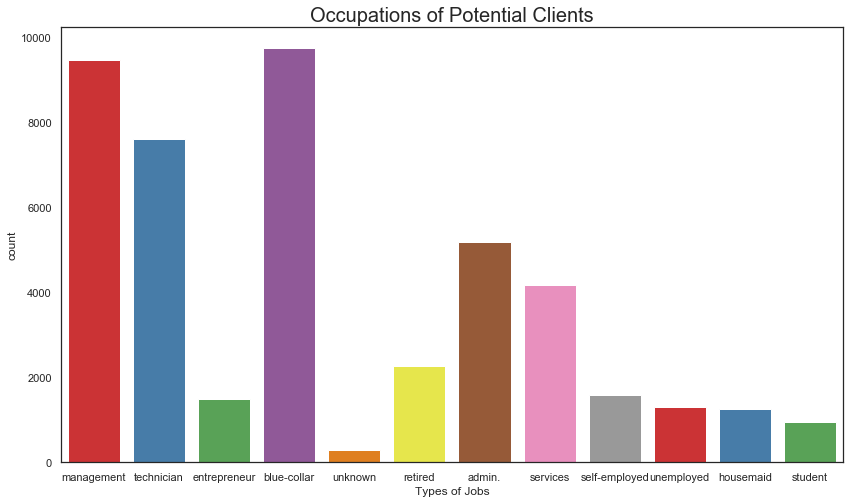

In [101]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(14,8))
sns.countplot(x="job", data=df, palette="Set1")
ax.set_title("Occupations of Potential Clients", fontsize=20)
ax.set_xlabel("Types of Jobs")
plt.show()


In [102]:
cross_job_category = pd.crosstab(df['deposit'], df['job']).apply(lambda x: x/x.sum() * 100)
print(cross_job_category)

job         admin.  blue-collar  entrepreneur  housemaid  management  \
deposit                                                                
0        87.797331    92.725031     91.728312  91.209677   86.244449   
1        12.202669     7.274969      8.271688   8.790323   13.755551   

job        retired  self-employed   services    student  technician  \
deposit                                                               
0        77.208481      88.157061  91.116996  71.321962   88.943004   
1        22.791519      11.842939   8.883004  28.678038   11.056996   

job      unemployed    unknown  
deposit                         
0         84.497314  88.194444  
1         15.502686  11.805556  


In [103]:
nodeposit_by_job = pd.DataFrame(cross_job_category.iloc[0])
nodeposit_by_job = np.around(nodeposit_by_job, 1)
nodeposit_by_job = nodeposit_by_job.values.tolist()
deposit_by_job = pd.DataFrame(cross_job_category.iloc[1])
deposit_by_job = np.around(deposit_by_job, 1)
deposit_by_job = deposit_by_job.values.tolist()

nodeposit_by_job


[[87.8],
 [92.7],
 [91.7],
 [91.2],
 [86.2],
 [77.2],
 [88.2],
 [91.1],
 [71.3],
 [88.9],
 [84.5],
 [88.2]]

In [104]:
deposit_by_job

[[12.2],
 [7.3],
 [8.3],
 [8.8],
 [13.8],
 [22.8],
 [11.8],
 [8.9],
 [28.7],
 [11.1],
 [15.5],
 [11.8]]

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

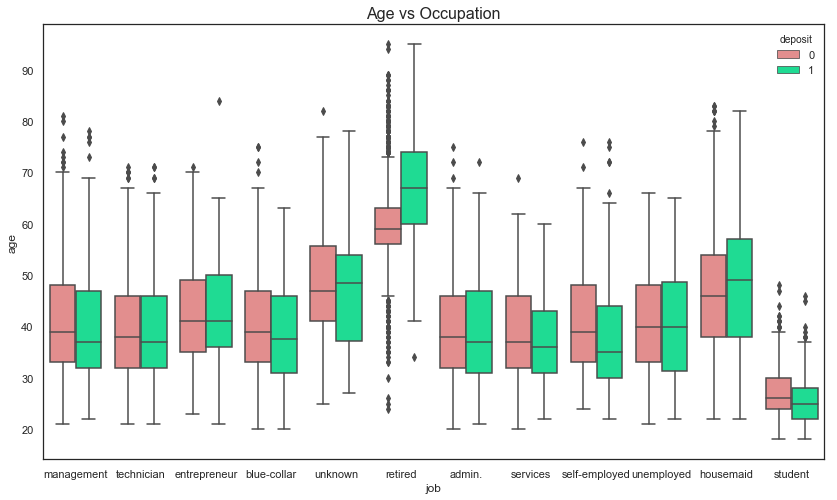

In [105]:
import seaborn as sns

# Consider removing this graph unless it tells us something.

ax = plt.figure(figsize=(14,8))
# 0 = Did not suscribe term deposits, 1 = Did suscribe term deposits.
ax = sns.boxplot(x="job", y="age", hue="deposit",
                  data=df, palette={0:'#F08080', 1:'#00FA9A'})
plt.title("Age vs Occupation", fontsize=16)
plt.xlabel(s="Type of Job", fontsize=14)
plt.ylabel(s="Age", fontsize=14)
legend_name = plt.legend()
legend_name.get_texts()[0].set_text('Refused Opening a T.D')
legend_name.get_texts()[1].set_text('Accepted Opening a T.D')

plt.show()


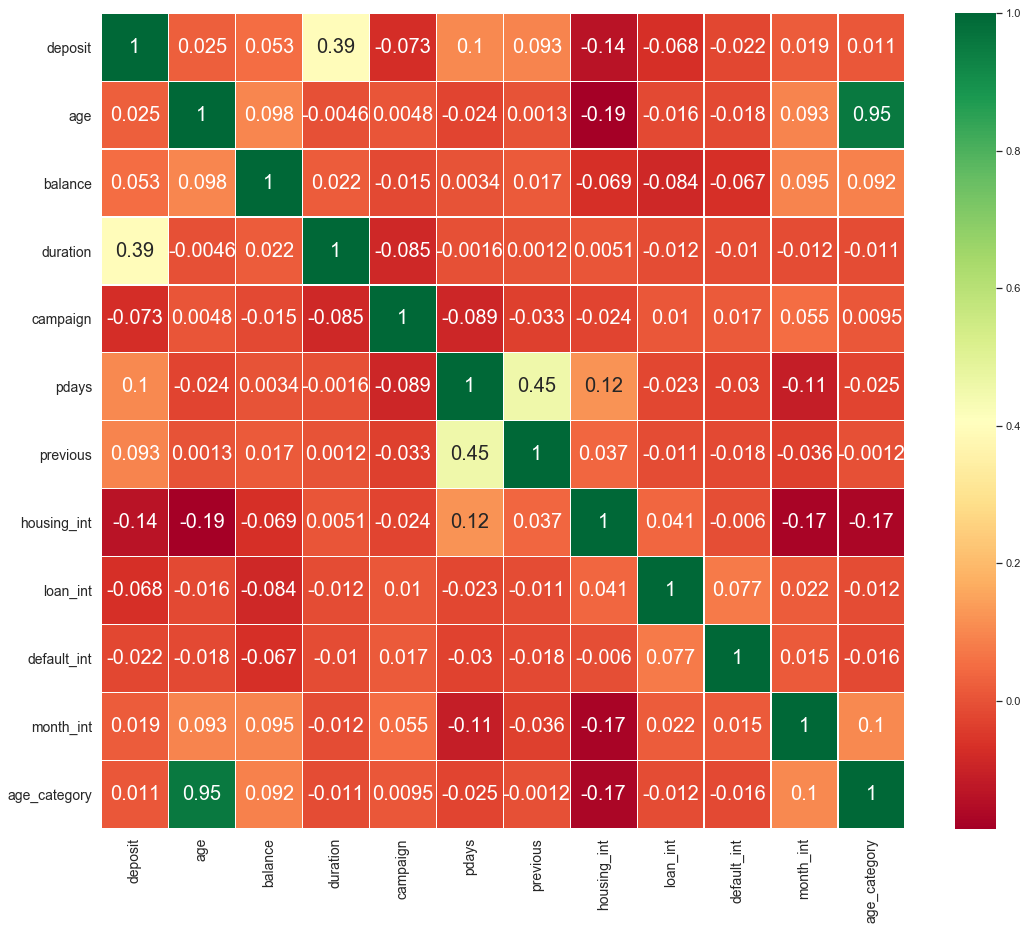

In [106]:
# 전체 변수 correlation 분석
corr = df.corr()

sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [107]:
df['balance_categories'] = np.nan

lst = [df]

for column in lst:
    column.loc[column['balance'] <= 0, 'balance_categories'] = 'no balance'
    column.loc[(column['balance'] > 0) & (column['balance'] <= 1000), 'balance_categories'] = 'low balance'
    column.loc[(column['balance'] > 1000) & (column['balance'] <= 5000), 'balance_categories'] = 'average balance'
    column.loc[column['balance'] > 5000, 'balance_categories'] = 'high balance'
    
df.head()
df['balance_categories'].value_counts()

low balance        23300
average balance    11786
no balance          7280
high balance        2845
Name: balance_categories, dtype: int64

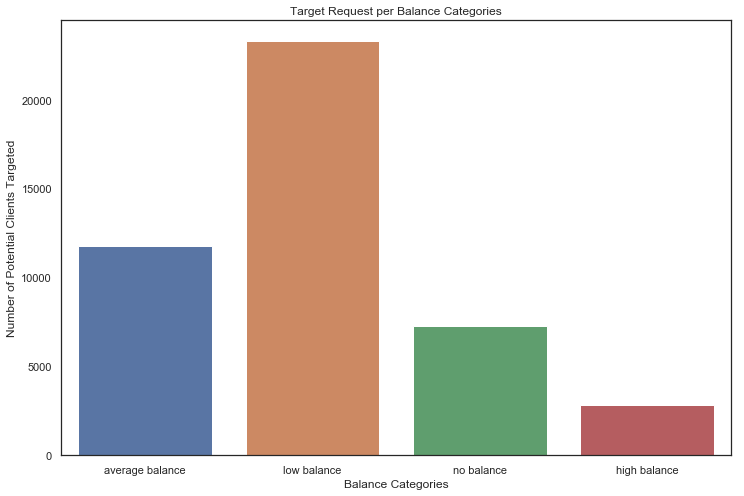

In [108]:
fig, ax = plt.subplots(figsize=(12,8))
g = sns.countplot(x="balance_categories", data=df)

plt.title("Target Request per Balance Categories")
plt.xlabel('Balance Categories')
plt.ylabel("Number of Potential Clients Targeted")

plt.show()

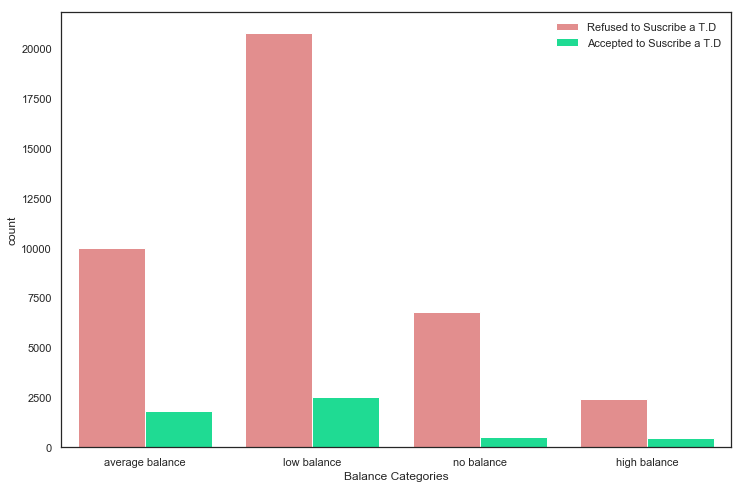

In [109]:
fig, ax = plt.subplots(figsize=(12,8))
g = sns.countplot(x="balance_categories", data=df, hue='deposit', palette={0:'#F08080', 1:'#00FA9A'})

legend_name = plt.legend()
legend_name.get_texts()[0].set_text('Refused to Suscribe a T.D')
legend_name.get_texts()[1].set_text('Accepted to Suscribe a T.D')
plt.xlabel('Balance Categories')


plt.show()


/Users/a80099708/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/Users/a80099708/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



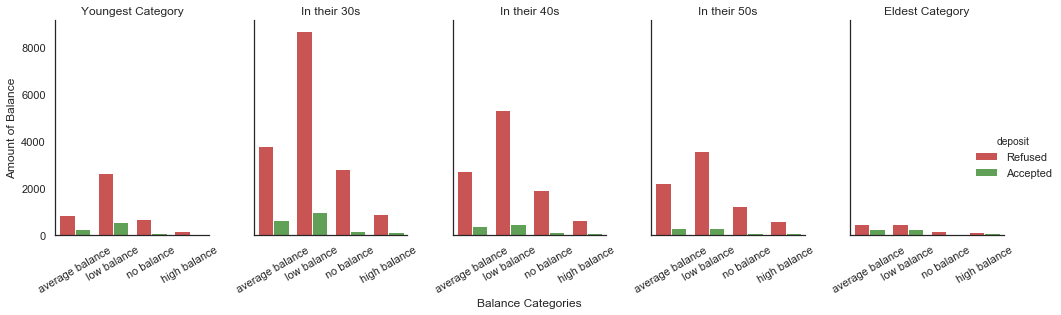

In [110]:
colors = ['255, 87, 51', '93, 109, 126  ']
labels = ["No", "Yes"]

g = sns.factorplot(x="balance_categories",
                   hue="deposit", col="age_category",
                   data=df, kind="count",
                   size=4, aspect=.7, palette={0:'#DD4040', 1:'#58AD4B'});

g.set_xticklabels(rotation=30)
g.axes[0,0].set_xlabel('')
g.axes[0,1].set_xlabel('')
g.axes[0,2].set_xlabel('Balance Categories')
g.axes[0,3].set_xlabel('')
g.axes[0,4].set_xlabel('')

# Set title
g.axes[0,0].set_title('Youngest Category')
g.axes[0,1].set_title('In their 30s')
g.axes[0,2].set_title('In their 40s')
g.axes[0,3].set_title('In their 50s')
g.axes[0,4].set_title('Eldest Category')
g.axes[0,0].set_ylabel('Amount of Balance')
# replace labels
new_labels = ['Refused', 'Accepted']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.show()


In [111]:
# 데이터 가공전 백업처리
df2 = df

In [112]:
# 문자형(범주형 변수) 제거
df2.head()

,deposit,age,job,marital,education,balance,contact,month,duration,campaign,pdays,previous,poutcome,housing_int,loan_int,default_int,month_int,age_category,balance_categories
0,0,58,management,married,tertiary,2143,unknown,may,4.35,1,-1,0,unknown,1,0,0,5,50,average balance
1,0,44,technician,single,secondary,29,unknown,may,2.52,1,-1,0,unknown,1,0,0,5,40,low balance
2,0,33,entrepreneur,married,secondary,2,unknown,may,1.27,1,-1,0,unknown,1,1,0,5,30,low balance
3,0,47,blue-collar,married,unknown,1506,unknown,may,1.53,1,-1,0,unknown,1,0,0,5,40,average balance
4,0,33,unknown,single,unknown,1,unknown,may,3.30,1,-1,0,unknown,0,0,0,5,30,low balance


In [113]:
# 변환전 3개 컬럼은 drop 처리한다.
df2.drop(['job', 'marital', 'education', 'contact', 'month', 'poutcome','age_category','balance_categories'], axis=1, inplace=True)

In [114]:
df2.head()

,deposit,age,balance,duration,campaign,pdays,previous,housing_int,loan_int,default_int,month_int
0,0,58,2143,4.35,1,-1,0,1,0,0,5
1,0,44,29,2.52,1,-1,0,1,0,0,5
2,0,33,2,1.27,1,-1,0,1,1,0,5
3,0,47,1506,1.53,1,-1,0,1,0,0,5
4,0,33,1,3.30,1,-1,0,0,0,0,5


In [115]:
# 특정 변수의 값이 지나치게 큰 값으로 되어, 계산에 영향을 주지 않도록 모든 변수의 범위를 -1 ~ 1 사이로 normalization 한다.
from sklearn.preprocessing import MinMaxScaler

nc = MinMaxScaler()

In [116]:
## values.reshape 은 메트릭스의 모양을 바꿔준다.
scaled_value_age = nc.fit_transform(df2['age'].values.reshape(-1,1))
scaled_value_balance = nc.fit_transform(df2['balance'].values.reshape(-1,1))
scaled_value_duration = nc.fit_transform(df2['duration'].values.reshape(-1,1))
scaled_value_month_int = nc.fit_transform(df2['month_int'].values.reshape(-1,1))

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



In [117]:
print(scaled_value_age, scaled_value_balance, scaled_value_duration, scaled_value_month_int)

[[0.51948052]
 [0.33766234]
 [0.19480519]
 ...
 [0.7012987 ]
 [0.50649351]
 [0.24675325]] [[0.09225936]
 [0.07306666]
 [0.07282153]
 ...
 [0.12468905]
 [0.07886805]
 [0.09977666]] [[0.0530682 ]
 [0.03074295]
 [0.01549347]
 ...
 [0.22910821]
 [0.10333049]
 [0.0734415 ]] [[0.36363636]
 [0.36363636]
 [0.36363636]
 ...
 [0.90909091]
 [0.90909091]
 [0.90909091]]


In [118]:
df2['age'] = scaled_value_age
df2['balance'] = scaled_value_balance
df2['duration'] = scaled_value_duration
df2['month_int'] = scaled_value_month_int

In [119]:
df2.head()

,deposit,age,balance,duration,campaign,pdays,previous,housing_int,loan_int,default_int,month_int
0,0,0.519481,0.092259,0.053068,1,-1,0,1,0,0,0.363636
1,0,0.337662,0.073067,0.030743,1,-1,0,1,0,0,0.363636
2,0,0.194805,0.072822,0.015493,1,-1,0,1,1,0,0.363636
3,0,0.376623,0.086476,0.018665,1,-1,0,1,0,0,0.363636
4,0,0.194805,0.072812,0.040259,1,-1,0,0,0,0,0.363636


In [120]:
# Classification 기준값인 deposit_class을 맨 뒤로 옮긴다.
dep = df2['deposit']
df2['deposit_class'] = dep
df2.drop(labels=['deposit'], axis=1,inplace = True)
df2.head()

,age,balance,duration,campaign,pdays,previous,housing_int,loan_int,default_int,month_int,deposit_class
0,0.519481,0.092259,0.053068,1,-1,0,1,0,0,0.363636,0
1,0.337662,0.073067,0.030743,1,-1,0,1,0,0,0.363636,0
2,0.194805,0.072822,0.015493,1,-1,0,1,1,0,0.363636,0
3,0.376623,0.086476,0.018665,1,-1,0,1,0,0,0.363636,0
4,0.194805,0.072812,0.040259,1,-1,0,0,0,0,0.363636,0


In [121]:
df2.dtypes

age              float64
balance          float64
duration         float64
campaign           int64
pdays              int64
previous           int64
housing_int        int64
loan_int           int64
default_int        int64
month_int        float64
deposit_class      int64
dtype: object

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
## numpy format을 iloc를 이용하여 pandas format으로 변환해줘야 한다. ','앞이 행, 그 뒤가 열
## [:,:-1] : 처음부터 맨 끝 앞까지만 가져온다   data.data 와 같은 의미
## [:,-1] : 처음ㅂ터 맨 끝 데이터까지 가져온다. data.target과 같은 의미
## random_state를 넣어주지 않으면 매번 다른 기준이 적용되므로, 42 옵션을 부여 관례적으로 부여한다.
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,:-1], df2.iloc[:,-1], test_size=0.3, random_state=42)

In [124]:
from sklearn.metrics import classification_report, confusion_matrix,precision_recall_curve,recall_score, f1_score, cohen_kappa_score,auc, precision_score
    
def model_evaluation(model) : 
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("confusion matrix :")
    print(confusion_matrix(y_test, y_pred))
    print("")
    print("score :", model.score(X_test,y_test))
    print("")
    print(classification_report(y_test,y_pred,digits=4))
    
    print("kappa :", cohen_kappa_score(y_test, y_pred))
    
    precision, recall, thresholds = precision_recall_curve(y_test,y_pred, pos_label=1)

    print("auprc :", auc(recall, precision, reorder=True))
    plt.figure(figsize=(2,2))
    plt.plot(recall, precision)   

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning:

The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.



confusion matrix :
[[11966     0]
 [ 1598     0]]

score : 0.8821881450899439

              precision    recall  f1-score   support

           0     0.8822    1.0000    0.9374     11966
           1     0.0000    0.0000    0.0000      1598

   micro avg     0.8822    0.8822    0.8822     13564
   macro avg     0.4411    0.5000    0.4687     13564
weighted avg     0.7783    0.8822    0.8270     13564

kappa : 0.0
auprc : 0.558905927455028


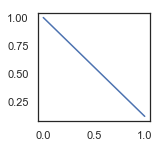

In [125]:
# baseline (가장 많은 class로 무조건 예측하는 경우)
from sklearn.dummy import DummyClassifier

du = DummyClassifier(strategy='most_frequent', constant=None)
du.fit(X_train, y_train)   
model_evaluation(du)

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence 

confusion matrix :
[[9687 2279]
 [ 371 1227]]

score : 0.8046299026835741

              precision    recall  f1-score   support

           0     0.9631    0.8095    0.8797     11966
           1     0.3500    0.7678    0.4808      1598

   micro avg     0.8046    0.8046    0.8046     13564
   macro avg     0.6565    0.7887    0.6802     13564
weighted avg     0.8909    0.8046    0.8327     13564

kappa : 0.38053765345844615
auprc : 0.5725790422916818


/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning:

The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.



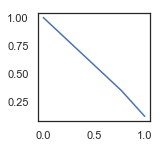

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', random_state=42)
gcv_lr = GridSearchCV(lr, param_grid={'max_iter' : [100,1000,10000]}, cv=3)

model_evaluation(gcv_lr)